In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tslearn import metrics
import os
from sklearn.preprocessing import normalize

In [2]:
stars_files = [file for file in os.listdir() if 'cleaned.pk1' in file]
stars_files

['adamsmith_stars_cleaned.pk1',
 'embulk_stars_cleaned.pk1',
 'google_stars_cleaned.pk1',
 'guillaume_stars_cleaned.pk1',
 'iven_stars_cleaned.pk1',
 'microsoft_stars_cleaned.pk1',
 'oleiade_stars_cleaned.pk1',
 'pandas_stars_cleaned.pk1',
 'yang_stars_cleaned.pk1',
 'zhn_stars_cleaned.pk1']

In [3]:
# Check shape
for file in stars_files:
    print(file, pd.read_pickle(file).shape)

adamsmith_stars_cleaned.pk1 (167, 6)
embulk_stars_cleaned.pk1 (1324, 6)
google_stars_cleaned.pk1 (18988, 6)
guillaume_stars_cleaned.pk1 (88, 6)
iven_stars_cleaned.pk1 (260, 6)
microsoft_stars_cleaned.pk1 (399, 6)
oleiade_stars_cleaned.pk1 (881, 6)
pandas_stars_cleaned.pk1 (21031, 6)
yang_stars_cleaned.pk1 (9102, 6)
zhn_stars_cleaned.pk1 (451, 6)


In [4]:
adamsmith = pd.read_pickle(stars_files[0])
embulk = pd.read_pickle(stars_files[1])
google = pd.read_pickle(stars_files[2])
guillaume = pd.read_pickle(stars_files[3])
iven = pd.read_pickle(stars_files[4])
microsoft = pd.read_pickle(stars_files[5])
oleiade = pd.read_pickle(stars_files[6])
pandas = pd.read_pickle(stars_files[7])
yang = pd.read_pickle(stars_files[8])
zhn = pd.read_pickle(stars_files[9])

In [5]:
def monthly_count(df):
    
    # Change to pandas datetime object
    df['starredAt'] =  df['starredAt'].apply(pd.Timestamp)
    
    # Group by committedDate's month and get the count
    df_group = df.groupby(df['starredAt'].dt.to_period('M')) \
                                                 .count()['id'] \
                                                 .reset_index() \
                                                 .rename(columns={'id': 'countByMonth'})
    
    # Normalize count and create a insert back into df_group
    df_group['countByMonthNorm'] = normalize([df_group['countByMonth']])[0]
    
    return df_group

In [6]:
adamsmith_star = monthly_count(adamsmith)
embulk_star  = monthly_count(embulk)
google_star  = monthly_count(google)
guillaume_star  = monthly_count(guillaume)
iven_star  = monthly_count(iven)
microsoft_star  = monthly_count(microsoft)
oleiade_star  = monthly_count(oleiade)
pandas_star  = monthly_count(pandas)
yang_star  = monthly_count(yang)
zhn_star  = monthly_count(zhn)

C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Convertin

In [7]:
from tslearn.metrics import dtw_path

In [8]:
monthly_star_list = [adamsmith_star, embulk_star, google_star, guillaume_star, iven_star, microsoft_star, 
                    oleiade_star, pandas_star, yang_star, zhn_star]
monthly_star_list_str = ['adamsmith_star', 'embulk_star', 'google_star', 'guillaume_star', 'iven_star', 'microsoft_star', 
                    'oleiade_star', 'pandas_star', 'yang_star', 'zhn_star']

In [9]:
def calc_dtw(issue_num):
    dtw = []
    path = []

    for el in range(len(monthly_star_list)):
        dtw_pathing = dtw_path(monthly_star_list[issue_num].iloc[:,-1].tolist(), monthly_star_list[el].iloc[:,-1].tolist())
        dtw.append((monthly_star_list_str[issue_num], monthly_star_list_str[el], dtw_pathing[1]))
        path.append((monthly_star_list_str[issue_num], monthly_star_list_str[el], dtw_pathing[0]))
        
    return dtw, path

In [10]:
def plot_graph(dtw, num_dtw, pr_num):
    print(dtw[pr_num])
    monthly_star_list[num_dtw].plot(x='starredAt', y='countByMonthNorm')
    monthly_star_list[pr_num].plot(x='starredAt', y='countByMonthNorm')

In [11]:
dtw_1, path_1 = calc_dtw(1)

In [12]:
dtw_1

[('embulk_star', 'adamsmith_star', 0.499392542347802),
 ('embulk_star', 'embulk_star', 0.0),
 ('embulk_star', 'google_star', 0.9397103163204412),
 ('embulk_star', 'guillaume_star', 0.3351077202052573),
 ('embulk_star', 'iven_star', 1.030165867072377),
 ('embulk_star', 'microsoft_star', 0.8359049028332702),
 ('embulk_star', 'oleiade_star', 0.9311500944400177),
 ('embulk_star', 'pandas_star', 0.748143420495125),
 ('embulk_star', 'yang_star', 0.8516991860780727),
 ('embulk_star', 'zhn_star', 0.2254856877505276)]

('embulk_star', 'yang_star', 0.8516991860780727)


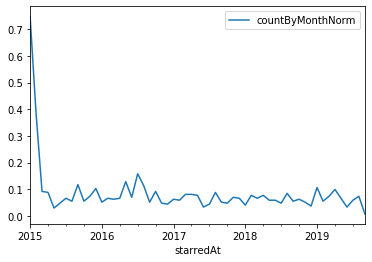

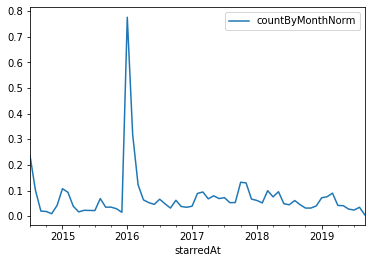

In [113]:
plot_graph(dtw_1, 1, 8)

('embulk_star', 'oleiade_star', 0.9311500944400177)


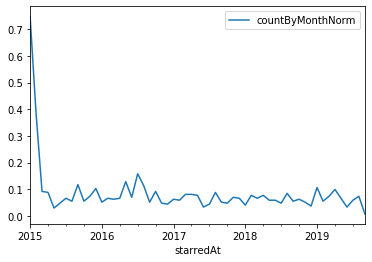

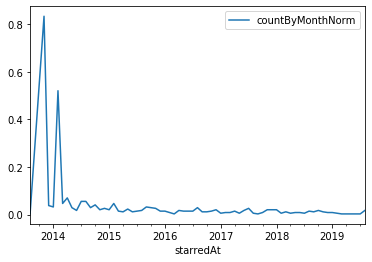

In [108]:
plot_graph(dtw_1, 1, 6)

### Test Moving Average

In [82]:
def moving_average(values, window):
    weights = np.repeat(1, window)/window
    smas = np.convolve(values, weights, 'valid')
    return smas

In [35]:
moving_average(pandas_star['countByMonthNorm'].tolist(), 3).shape

(107,)

In [74]:
y = moving_average(embulk_star['countByMonthNorm'].tolist(), 20)

In [75]:
x = [i for i in range(len(y))]

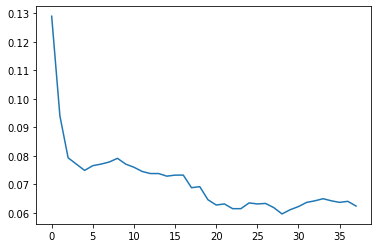

In [76]:
plt.plot(x, y)

In [78]:
pandas_star.head()

,starredAt,countByMonth,countByMonthNorm
0,2010-08,558,0.207399
1,2010-09,20,0.007434
2,2010-10,36,0.013381
3,2010-11,30,0.011150
4,2010-12,31,0.011522


In [104]:
x = moving_average(zhn_star['countByMonthNorm'].tolist(), 10)
x1 = [i for i in range(len(x))]
y = moving_average(embulk_star['countByMonthNorm'].tolist(), 10)
y1 = [i for i in range(len(y))]
dtw_path(x,y)[1]

0.12660061096626146

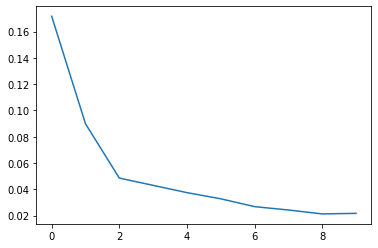

In [105]:
plt.plot(x1, x)

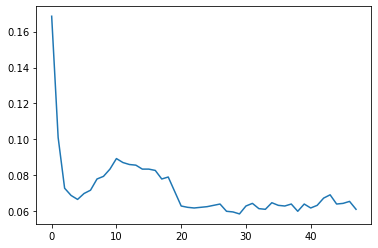

In [106]:
plt.plot(y1, y)